# Mushroom Classification: Can I eat it?

The following machine learning classification models are used to determine whether mushrooms are poisonous or edible:
1. Logistic Regression
2. KNN
3. Decision Tree Classifier
4. Random Forest Classifier

Dataset from kaggle: https://www.kaggle.com/uciml/mushroom-classification

Attribute Information: (classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Importing libraries and the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All columns are categorical, next checking how many categories there are per column

In [7]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

Next checking for null values

In [8]:
df.isna().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

No null values, checking whether the dataset is well balanced.

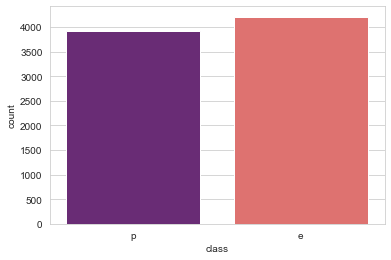

In [9]:
sns.set_style('whitegrid')
sns.countplot(df['class'], palette = 'magma')

Data is balanced

Identifying which features have the most discrepancy between instances of poisonous and edible mushrooms

In [10]:
#Function to return features with categories that show a high discrepancy between instances of poisonous and edible
#mushrooms. The percentage difference between number of instances of poisonous and edible mushrooms for each category
#is found. Only categories with over 1000 observations are included.
def percentage_difference(col):
    pois = df[col][df['class']=='p'].value_counts()
    edi = df[col][df['class']=='e'].value_counts()
    diff = pois-edi
    tot = pois+edi
    per_diff = diff/tot*100
    for i, category in enumerate(per_diff):
        if abs(category) > 70 and tot[i]>1000: 
            print(col)
            list_of_features.append(col)
            break
    return None

In [11]:
list_of_features = []
for col in df.columns.drop('class'):
    percentage_difference(col)

odor
gill-spacing
gill-size
gill-color
stalk-surface-above-ring
stalk-surface-below-ring
spore-print-color
habitat


These features could be the most informative when determining whether a mushroom is poisonous or edible. Below are countplots showing the distribution of instances of poisonous and edible mushrooms in each category.

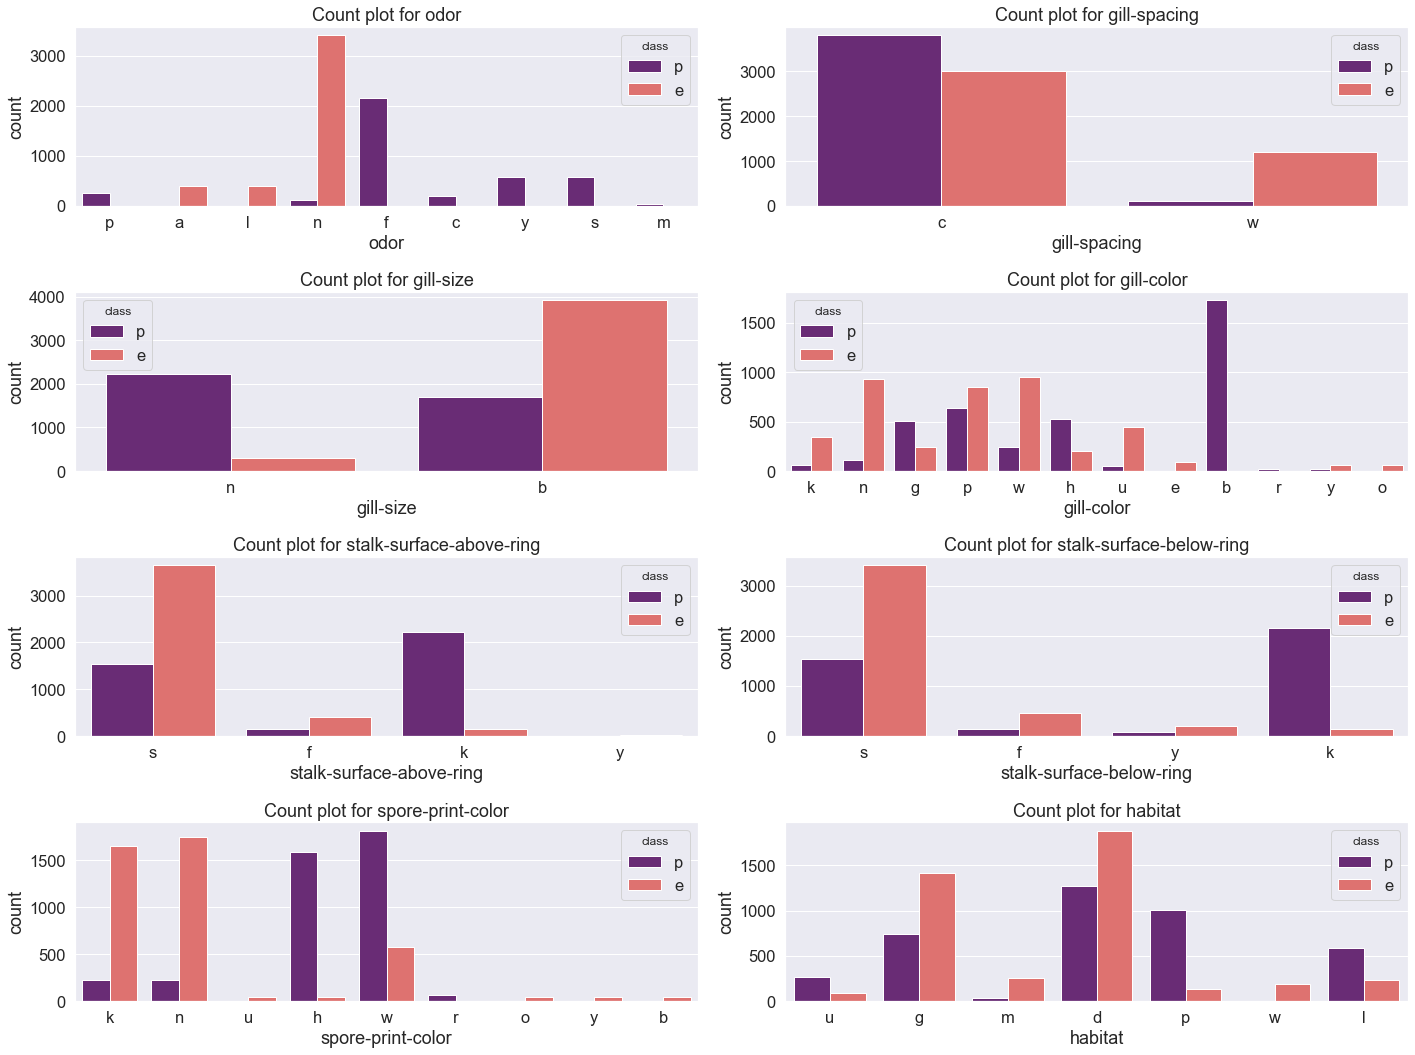

In [16]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 15))
for i, feature in enumerate(list_of_features):
    plot = sns.countplot(x = feature, hue = 'class', data = df, ax = axes[i//2, i%2], palette = 'magma')
    plot.set_title("Count plot for "+feature)
plt.tight_layout()
    

Features here that stand out are:
- Spore print colour. It has large discrepancies for a number of categories, k and n both indicate edible is more likely, whilst h and w indicate poisonous is more likely. 
- Odors n and f, where n likely indicates edible and f indicates poisonous.
- Gill colour b, which indicates it is likely poisonous.
- Stalk surface above and below ring k which indicates more likely poisonous.

Next creating dummy variables to check for correlation between features. This may pick up important features missed by the prior visualisation. 

In [69]:
df_dummies=pd.get_dummies(df,columns=df.columns,drop_first=True)
df_dummies.head()

,class_1,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Next checking correlation of features with class. Absolute values used to identify strong positive and negative correlations.

In [71]:
abs(df_dummies.corr()['class_1']).sort_values(ascending = False).head(10)

class_1                       1.000000
odor_5                        0.785557
odor_2                        0.623842
stalk-surface-above-ring_1    0.587658
stalk-surface-below-ring_1    0.573524
ring-type_4                   0.540469
gill-size_1                   0.540024
bruises_1                     0.501530
stalk-surface-above-ring_2    0.491314
spore-print-color_1           0.490229
Name: class_1, dtype: float64

Results for correlation of features largely match the percentage difference countplots above - with categories from odor, stalk surface above and below ring, gill size and spore print showing a high discrepancy. The correlation picked up on two features that were omitted by the percentage difference calculations - ring type 4 and bruises 1. These are shown below.

Text(0.5, 1.0, 'Count plot for bruises')

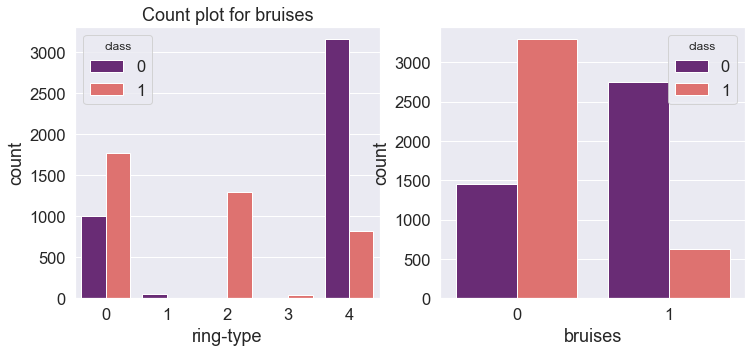

In [73]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'ring-type', hue = 'class', data = df, ax = ax1, palette = 'magma')
ax1.set_title("Count plot for ring type")
sns.countplot(x = 'bruises', hue = 'class', data = df, ax = ax2, palette = 'magma')
ax1.set_title("Count plot for bruises")

So far we have only looked at the distribution of poisonous and edible mushrooms in individual features. Since there are a large number of features, we can try to visualise more of the dataset at once using PCA and check for clusters of poisonous or edible mushrooms within the variable space.

# PCA Analysis of data

Encoding categories for simpler plotting

In [76]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df
encoder = LabelEncoder() 
for col in df.columns:
    df_encoded[col] = encoder.fit_transform(df[col])


In [77]:
df_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Importing library for PCA, creating PCA instance with two components, fitting it to the data and transforming the data.

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components=2)

In [80]:
pca.fit(df_encoded)

PCA(n_components=2)

In [81]:
df_pca = pca.transform(df_encoded)

In [82]:
df_pca.shape

(8124, 2)

Plotting the two components with class as hue to get a sense of the shape of the dataset.

Text(0, 0.5, 'Second Principal Component')

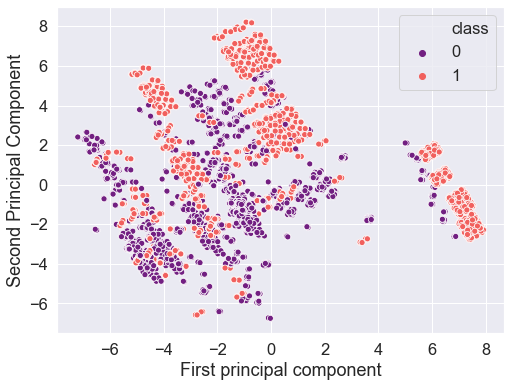

In [83]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_pca[:,0],df_pca[:,1],palette='magma', hue=df['class'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Checking how much of the variation in the data is explained by the two components

In [85]:
print("Percentage of variance explained: {:.3}% ".format(pca.explained_variance_ratio_.sum()*100))

Percentage of variance explained: 50.3% 


PCA summary: 

Some clustering of poisonous and edible mushrooms can be seen, with high overlap in the bulk of the variable space. Both poisonous and edible mushrooms are seen across almost the whole variable space, however the upper extremes of the principle components contain more poisonous mushrooms. Almost all the areas that contain edible mushrooms also contain poisonous mushrooms. 

HOWEVER, it is important to note that this PCA visualisation only accounts for around 50% of the variance in the data. This is much too low to draw confident conclusions from.

Trying with three components to better visualise the data.

In [86]:
pca3 = PCA(n_components=3)

In [87]:
pca3.fit(df_encoded)

PCA(n_components=3)

In [88]:
PC3 = pca3.transform(df_encoded)

In [89]:
PC3.shape

(8124, 3)

In [90]:
print("Percentage of variance explained: {:.3}% ".format(pca3.explained_variance_ratio_.sum()*100))

Percentage of variance explained: 62.5% 


More variance is explained, however the percentage is still quite low.

Importing library for 3D plot

In [91]:
from mpl_toolkits import mplot3d

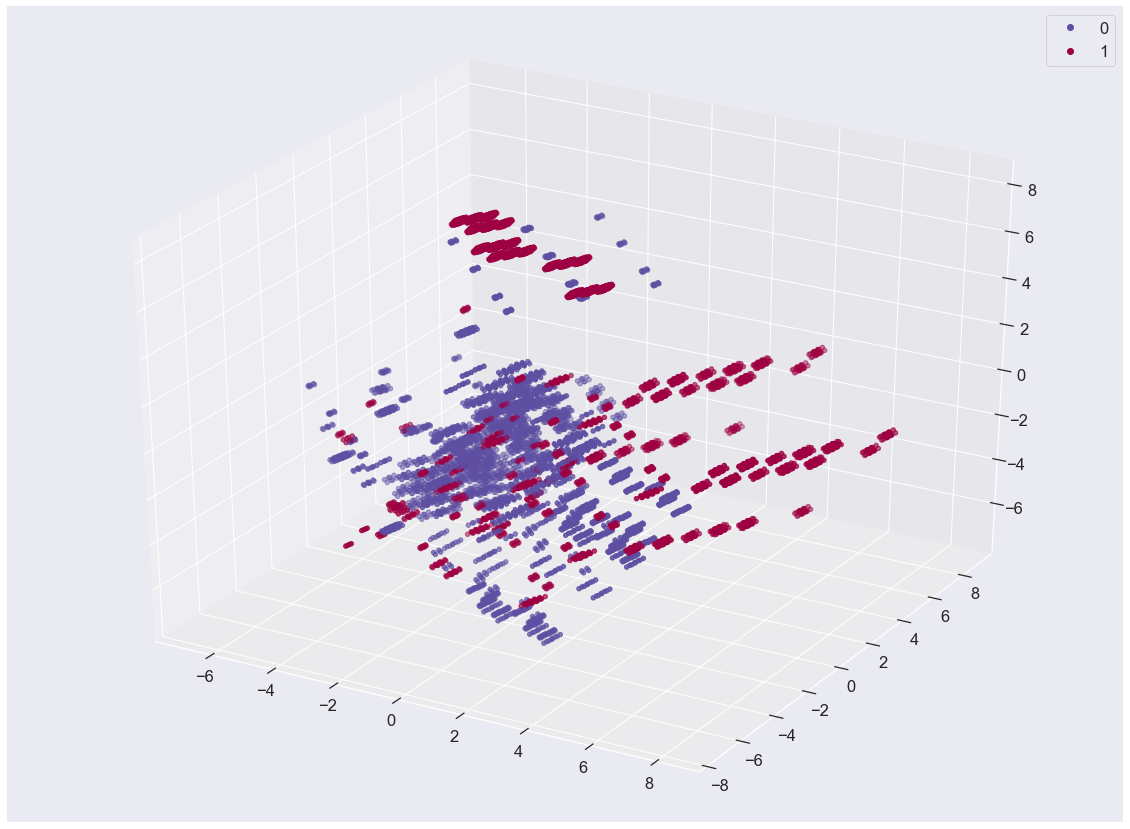

In [92]:
fig = plt.figure(figsize = (20,15))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
z = PC3[:,0]
x = PC3[:,1]
y = PC3[:,2]
plot = ax.scatter3D(x, y, z, 'gray', c = df_encoded['class'], cmap = 'Spectral_r')
plt.legend(handles=plot.legend_elements()[0], labels=[0,1])

Plotting graph from different angles to better see data.

Text(0.5, 0.92, 'View 2')

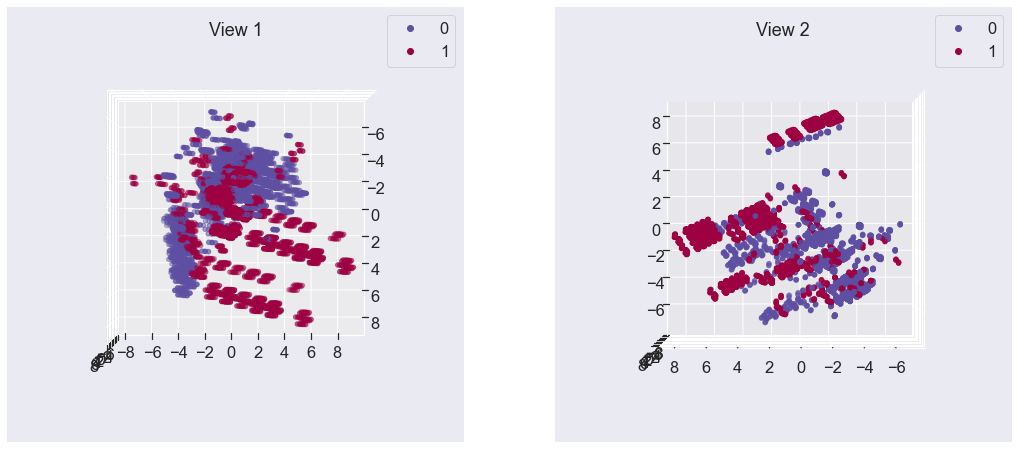

In [93]:
z = PC3[:,0]
x = PC3[:,1]
y = PC3[:,2]

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(x, y, z, 'gray', c = df_encoded['class'], cmap = 'Spectral_r')
ax.view_init(90, 0)
plt.legend(handles=plot.legend_elements()[0], labels=[0,1])
plt.title('View 1')


ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(x, y, z, 'gray', c = df_encoded['class'], cmap = 'Spectral_r')
ax.view_init(0, 90)
plt.legend(handles=plot.legend_elements()[0], labels=[0,1])
plt.title('View 2')

This visualisation still only accounts for 62% of the variation and there is a large overlap for most of the space. View 1 shows more clearly the grouping of poisonous mushrooms at the upper extremes of two of the components. Most of the areas containing edible mushrooms also contain poisonous mushrooms too and so SVC may not be suitable for this data.

Now moving on to using models to predict the outcome.

# Logistic Regression

Importing libraries, splitting the data into a train and test set, fitting the model and transforming the data.

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X = df_dummies.drop('class_1', axis = 1)
y = df_dummies['class_1']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
logreg_model = LogisticRegression()

In [99]:
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [104]:
logreg_pred = logreg_model.predict(X_test)

Evaluating the model

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [103]:
print(confusion_matrix(y_test, logreg_pred))

[[1257    0]
 [   2 1179]]


The model was very successful - with only two observations placed into the wrong categories.

# K Nearest Neighbours

In [106]:
from sklearn.neighbors import KNeighborsClassifier

Finding optimum k value by creating instances of the model with different k values and plotting the error rate.

In [107]:
#Cycle through range of n_neighbors to find optimum number
error_rate = []
for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

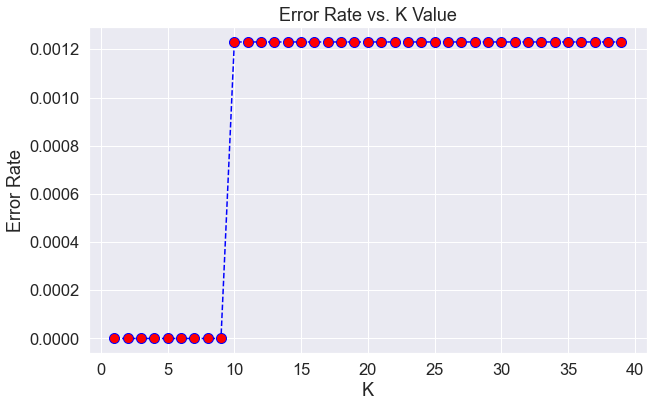

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Smaller k values seem to be more accurate, this could be because there is a large overlap of poisonous and edible mushrooms for most of the data set, but small clusters of each class within the bulk of the data (i.e. very similar mushrooms appear to have the same class).

Next retraining model with k = 5

In [109]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [110]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [111]:
print(confusion_matrix(y_test, knn_pred))

[[1257    0]
 [   0 1181]]


The model performed extremely well - with 100% accuracy.

# Decision Tree Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
dtree_model = DecisionTreeClassifier()

In [114]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [115]:
dtree_pred = dtree_model.predict(X_test)

In [116]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [117]:
print(confusion_matrix(y_test, dtree_pred))

[[1257    0]
 [   0 1181]]


Again the model performed very well with no incorrect classification.

# Random Forest Model

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rfc_model = RandomForestClassifier(n_estimators=600)

In [120]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [121]:
rfc_pred = rfc_model.predict(X_test)

In [122]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [123]:
print(confusion_matrix(y_test, rfc_pred))

[[1257    0]
 [   0 1181]]


Again, 100% accuracy but this was expected since the decision tree performed so well.

# Summary

All the models performed extremely well, with logistic regression performing slightly worse with two incorrect classifications compared to zero with the rest of the models. Data visualisation using count plots showed that the distribution of poisonous vs edible mushrooms could be split significantly by several features, which is likely why the decision tree and random forest models worked so well. Visualisation by PCA showed that although there is a large overlap in the data, very similar mushrooms held the same class which meant that the KNN model with a low k value was so successful. 